# 두 마리의 토끼 잡기<br>
by uramoon@kw.ac.kr (<a href="https://raw.githubusercontent.com/ronreiter/interactive-tutorials/master/LICENSE">Apache 2.0 License</a>)<br>
하나의 인공신경망으로 MNIST와 우리가 그린 그림을 모두 잘 예측하도록 만들어봅시다.<br>
(MNIST 테스트 데이터 정확도 95% 이상 **AND** 우리가 그린 테스트 데이터 정확도 95% 이상)

자료실의 our_mnist.npz 파일을 Colab에 업로드한 후 다음을 진행합니다.<br>
our_mnist.npz 파일은 여러분이 그린 그림으로 만든 데이터셋입니다.

## 우리가 그린 그림 가져오기

In [3]:
import numpy as np

npzfile = np.load('our_mnist.npz')

our_train_images = npzfile['our_train_images']
our_train_labels = npzfile['our_train_labels']
our_test_images = npzfile['our_test_images']
our_test_labels = npzfile['our_test_labels']

## 우리가 그린 훈련 데이터 살펴보기
우리가 그린 훈련 데이터는 [0, 1]로 정규화가 필요 없음을 알 수 있습니다.

In [4]:
print(f'훈련 이미지 모양: {our_train_images.shape}')
print(f'훈련 데이터 값의 범위: [{our_train_images.min()}, {our_train_images.max()}]')
print(f'훈련 레이블 내용: {our_train_labels}')

훈련 이미지 모양: (230, 28, 28, 1)
훈련 데이터 값의 범위: [0.0, 1.0]
훈련 레이블 내용: [4 9 6 6 2 6 7 6 0 9 1 3 5 7 2 4 4 4 1 0 1 3 5 3 5 3 5 3 5 9 3 1 1 1 9 0 8
 4 4 3 6 3 7 8 5 4 7 4 2 8 3 4 7 4 1 6 1 5 7 8 2 6 1 4 1 6 7 6 4 9 1 8 1 0
 4 9 0 6 4 5 0 0 0 3 5 4 7 3 9 3 8 2 6 1 2 5 5 3 9 4 6 3 6 8 9 1 7 6 4 1 4
 5 9 9 4 6 8 0 2 7 1 6 9 8 5 0 3 0 2 1 0 3 3 6 6 6 5 2 0 2 5 8 7 6 9 9 2 7
 2 8 5 2 6 1 5 8 5 7 7 0 3 7 0 9 9 0 6 0 7 3 8 0 9 8 7 1 8 2 7 4 2 5 0 7 7
 8 2 7 8 2 3 2 1 3 8 9 5 8 5 2 4 8 0 4 3 1 2 3 9 7 0 1 9 0 0 8 4 9 6 5 8 9
 2 2 7 1 5 9 2 8]


## TODO1: MNIST 불러와서 [0, 1]로 정규화하기

In [5]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# CNN에서 사용하기 위해 흑백임을 나타내는 차원 추가 (28, 28) -> (28, 28, 1)
# reshape로도 가능
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

11490434/11490434 [==============================] - 1s 0us/step


## 그림 비교해보기
우리가 직접 그린 숫자와 MNIST 데이터셋은 필체가 서로 다르기 때문에 단일 데이터셋으로 학습한 모델의 성능에 한계가 있었음을 확인할 수 있습니다.

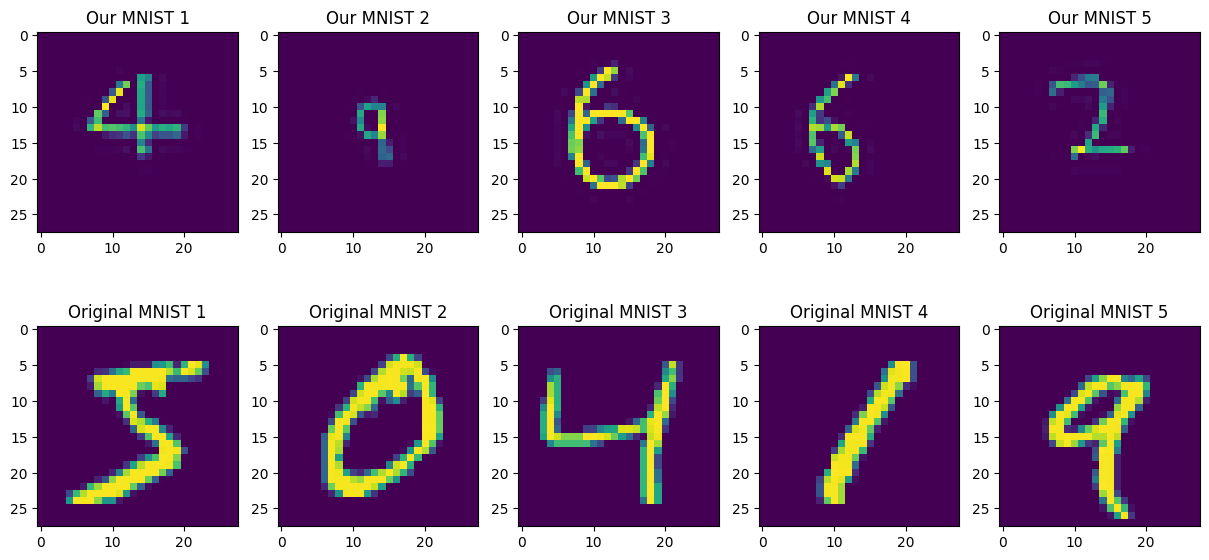

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

plt.figure(figsize=(15, 7))
for i in range(5):
  plt.subplot(2, 5, i + 1) 
  plt.imshow(our_train_images[i])
  plt.title(f'Our MNIST {i + 1}')
  plt.subplot(2, 5, i + 6) 
  plt.imshow(train_images[i])  
  plt.title(f'Original MNIST {i + 1}')
plt.show()

## TODO2: 모델 만들기<br>
자유롭게 하나의 모델을 만들어 MNIST 테스트 데이터셋과 우리의 테스트 데이터셋에서 95% 이상의 정확도를 달성해보세요.<br>

In [8]:
# 모델을 자유롭게 만들어 보세요. (여러 개의 셀 사용 가능)

from keras import models
from keras import layers
from keras.callbacks import EarlyStopping

model = models.Sequential()
model.add(layers.Input(shape=(28,28,1)))

model.add(layers.Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(layers.Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(layers.Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=256, kernel_size = (3,3), activation="relu"))    
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))   
model.add(layers.Dense(10, activation="softmax"))
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

## TODO3: 나만의 훈련 데이터 만들기

6만장의 MNIST 훈련 데이터와 우리가 그린 230장의 훈련 데이터를 잘 가공하여 나만의 훈련 데이터를 만들어 보세요.<br>
단순하게 둘을 이어붙인다면 우리가 그린 230장은 훈련에서 거의 무시되고 6만장의 MNIST 훈련 데이터 위주로 훈련이 일어납니다.


테스트 데이터 혹은 테스트 데이터를 가공한 데이터셋을 훈련 데이터에 포함하면 안됩니다. **실수하기 쉬우니 조심하세요.**<br>

In [19]:
print(len(our_train_images))

230


In [20]:
# TODO: 나만의 훈련 데이터를 자유롭게 만들어 보세요. (증강 등을 위해 여러 개의 코드블록을을 자유로이 사용 가능)
# Hint: https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html 사용 가능 
# 검증 데이터를 사용할 예정이라면 순서도 섞어 주세요.

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(   
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False)

augmented_train_images = np.empty((len(our_train_images)*100, 28, 28, 1))#TODO: 훈련 데이터가 100배 늘어나면 이미지의 모양은?)
augmented_train_labels = np.empty((len(our_train_images)*100,))#TODO: 훈련 데이터가 100배 늘어나면 레이블의 모양은?)

# 배열 채우기
for i in range(len(our_train_images)):
  image = our_train_images[i]#TODO: 원본 이미지 지정
  label = our_train_labels[i]#TODO: 이미지의 답안 지정
  for j in range(100):
    augmented_train_images[i*100 + j] = datagen.random_transform(image) #TODO: datagen으로 생성한 이미지
    augmented_train_labels[i*100 + j] = label #TODO: 새로 생성한 이미지의 레이블

my_train_images = np.concatenate((train_images, augmented_train_images), axis=0)
my_train_labels = np.concatenate((train_labels, augmented_train_labels), axis=0)
idx = np.random.permutation(len(my_train_images))
my_train_images, my_train_labels = my_train_images[idx], my_train_labels[idx]

## TODO4: 훈련하기
자유롭게 모델을 훈련하여 MNIST 테스트 데이터셋과 우리의 테스트 데이터셋에서 95% 이상의 정확도를 달성해보세요.<br>
다만 테스트 데이터 혹은 테스트 데이터를 가공한 데이터셋으로 훈련하면 안됩니다. **실수하기 쉬우니 조심하세요.**<br>


In [21]:
# 자유롭게 훈련해 보세요.
from keras.callbacks import EarlyStopping

epochs = 10000
batch_size = 128
es = EarlyStopping(patience=10, restore_best_weights=True)

model.fit(my_train_images, my_train_labels, epochs=epochs, batch_size=batch_size, callbacks=es, validation_split=0.2)

Epoch 1/10000
519/519 [==============================] - 8s 15ms/step - loss: 0.0386 - accuracy: 0.9885 - val_loss: 0.0193 - val_accuracy: 0.9951
Epoch 2/10000
519/519 [==============================] - 7s 13ms/step - loss: 0.0108 - accuracy: 0.9970 - val_loss: 0.0172 - val_accuracy: 0.9952
Epoch 3/10000
519/519 [==============================] - 7s 13ms/step - loss: 0.0060 - accuracy: 0.9983 - val_loss: 0.0194 - val_accuracy: 0.9954
Epoch 4/10000
519/519 [==============================] - 7s 13ms/step - loss: 0.0060 - accuracy: 0.9981 - val_loss: 0.0229 - val_accuracy: 0.9945
Epoch 5/10000
519/519 [==============================] - 7s 13ms/step - loss: 0.0060 - accuracy: 0.9982 - val_loss: 0.0285 - val_accuracy: 0.9942
Epoch 6/10000
519/519 [==============================] - 7s 13ms/step - loss: 0.0071 - accuracy: 0.9980 - val_loss: 0.0266 - val_accuracy: 0.9943
Epoch 7/10000
519/519 [==============================] - 7s 13ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0209 -

## TODO5: MNIST 테스트 데이터로 평가하기

In [22]:
# MNIST 테스트 데이터에서 정확도 95% 이상 달성하기
# 코드 실행만 하면 됩니다.

score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02205251157283783
Test accuracy: 0.9940000176429749


## TODO6: 우리가 만든 테스트 데이터로 평가하기

In [23]:
# 우리가 만든 테스트 데이터에서도 정확도 95% 이상 달성하기
# 코드 실행만 하면 됩니다.

score = model.evaluate(our_test_images, our_test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.06029852479696274
Test accuracy: 0.9857142567634583


동일한 모델로 TODO5와 TODO6에서 정확도 95% 이상 달성해야 합니다.<br>
실패했다면 TODO2부터 검토하여 다시 도전해 보세요.